## Part 5 Power-laws and the friendship paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

In [25]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt


In [49]:
def BAGraph(size):   
    tmp = nx.Graph()
    tmp.add_nodes_from([1,2])
    tmp.add_edge(1,2)
    #Create a list of all the edges in the graph and flatten the list
    edges = list(tmp.edges)
    flat_list = [item for sublist in edges for item in sublist]

    for i in range(3,size+1):
        edges = list(tmp.edges)
        flat_list = [item for sublist in edges for item in sublist]
        x = random.choice(flat_list)
        tmp.add_node(i)
        tmp.add_edge(i,x)
    return tmp      

G5000 = BAGraph(5000)  

In [91]:
#Pick a node i at random (e.g. use random.choice). Find its degree.
rNode = random.choice(list(G5000))

rNodeDegree = G5000.degree(rNode)

print("Our random node: ", rNode)
print("The degree of the random node: ", rNodeDegree)

Our random node:  590
The degree of the random node:  6


In [94]:
#Find i's neighbors. And calculate their average degree.
nodeNeighbors = list(G5000.neighbors(rNode))
print("The node's neighbour: ", nodeNeighbors)

p = [G5000.degree(n) for n in nodeNeighbors]
ave = sum(p)/len(p)
print(p)
print("Average degree of neighbour nodes", ave)

The node's neighbour:  [2, 929, 1227, 2606, 3158, 3274]
[101, 2, 5, 2, 1, 1]
Average degree of neighbour nodes 18.666666666666668


In [135]:
#Compare the two numbers to check if it's true that i's friends (on average)
#have more friends than i.

def friendship(G, node):
    nodeNeighbors = list(G.neighbors(node))

    p = [G.degree(n) for n in nodeNeighbors]
    ave = sum(p)/len(p)
    
    return G.degree(node) < ave


# print(friendship(G5000, rNode))


#Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

randomNodes = random.sample(list(G5000), 1000)
counter = 0

for i in randomNodes:
     if friendship(G5000, i):
            counter += 1
            
print("The friendship paradox is true in: ", counter/len(randomNodes)*100, "% of the time")


The friendship paradox is true in:  85.1 % of the time


Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

In [163]:
size = 5000

def BAGraphWithout(size):   
    tmp = nx.Graph()
    tmp.add_nodes_from([1,2])
    tmp.add_edge(1,2)
    #Create a list of all the edges in the graph and flatten the list
#     nodes = list(tmp.nodes)
#     flat_list = [item for sublist in nodes for item in sublist]

    for i in range(3,size+1):
        nodes = list(tmp.nodes)
#         flat_list = [item for sublist in nodes for item in sublist]
        x = random.choice(nodes)
        tmp.add_node(i)
        tmp.add_edge(i,x)
    return tmp

g2 = BAGraphWithout(size)
# nx.draw(g2, node_size = 50)

In [164]:
nodesInG2 = [g2.degree(n) for n in g2.nodes]
G2ave = sum(nodesInG2)/len(nodesInG2)
prob = G2ave/(size-1)
print(sum(nodesInG2))
print(len(nodesInG2))
print(prob)



9998
5000
0.0004


In [165]:
g3 = nx.erdos_renyi_graph(size, prob)
# nx.draw(g3, node_size = 50)

Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

[ 1.   2.5  4.   5.5  7.   8.5 10.  11.5 13.  14.5 16. ]
[3762  623  453   71   70   11    7    1    1    1]


Text(0.5, 1.0, 'BA')

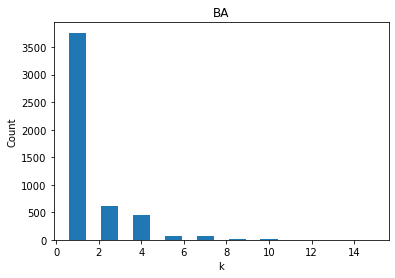

In [175]:
degrees = [g2.degree(n) for n in g2.nodes()]
#print(degrees)
#print(np.histogram(degrees))
hist,bin_edges = np.histogram(degrees,10)
print(bin_edges)
print(hist)

plt.bar(bin_edges[:-1],hist)
plt.xlabel("k")
plt.ylabel("Count")
plt.title("BA")

[0.  0.8 1.6 2.4 3.2 4.  4.8 5.6 6.4 7.2 8. ]
[ 683 1273 1333  946    0  483  184   69   25    4]


Text(0, 0.5, 'Count')

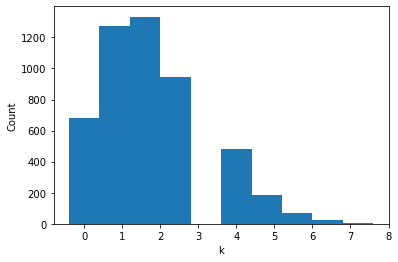

In [173]:
degrees = [g3.degree(n) for n in g3.nodes()]
#print(degrees)
#print(np.histogram(degrees))
hist,bin_edges = np.histogram(degrees,10)
print(bin_edges)
print(hist)

plt.bar(bin_edges[:-1],hist)
plt.xlabel("k")
plt.ylabel("Count")
plt.title("ER")